In [3]:
import os
import copy
import pandas as pd
import numpy as np
from collections import Counter
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
xlsx = pd.ExcelFile('C:/Users/21624/Downloads/Requête01.xlsx')
sheets = pd.read_excel(xlsx, sheet_name=None, index_col=0, 
                       na_filter=True, convert_float=False)
Requête2 = sheets['Requête2']

In [5]:
Requête2.head(50)

,site_id,type,height,clutter_class,datetime,temp,wind_dir,wind_speed,humidity,precipitation,...,card_type,adaptive_modulation,freq_band,link_length,bbe,rxlevmax,scalibility_score,capacity,modulation,rlf
station_no,,,,,,,,,,,,,,,,,,,,,
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,9.5,5.0,3.6,88.0,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX
WS_17227,RL_U7OA>,ENK,27.0,OPEN LAND,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,...,cardtype2,Disable,f3,NaN,0.0,-29.7,NaN,325.0,128QAM,FAUX


In [6]:
Requête2.shape

(323080, 27)

In [7]:
Requête2.dropna(how='any',inplace=True)

In [8]:
Requête2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2036 entries, WS_17232 to WS_18026
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   site_id              2036 non-null   object 
 1   type                 2036 non-null   object 
 2   height               2036 non-null   float64
 3   clutter_class        2036 non-null   object 
 4   datetime             2036 non-null   object 
 5   temp                 2036 non-null   float64
 6   wind_dir             2036 non-null   float64
 7   wind_speed           2036 non-null   float64
 8   humidity             2036 non-null   float64
 9   precipitation        2036 non-null   float64
 10  precipitation_coeff  2036 non-null   float64
 11  pressure             2036 non-null   float64
 12  pressure_sea_level   2036 non-null   float64
 13  tip                  2036 non-null   object 
 14  mlid                 2036 non-null   object 
 15  mw_connection_no     2036 non-nu

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

Requête2["site_id"] = lb_make.fit_transform(Requête2["site_id"])
Requête2["type"] = lb_make.fit_transform(Requête2["type"])
Requête2["clutter_class"] = lb_make.fit_transform(Requête2["clutter_class"])
Requête2["datetime"] = lb_make.fit_transform(Requête2["datetime"])
Requête2["tip"] = lb_make.fit_transform(Requête2["tip"])
Requête2["mlid"] = lb_make.fit_transform(Requête2["mlid"])
Requête2["polarization"] = lb_make.fit_transform(Requête2["polarization"])
Requête2["card_type"] = lb_make.fit_transform(Requête2["card_type"])
Requête2["adaptive_modulation"] = lb_make.fit_transform(Requête2["adaptive_modulation"])
Requête2["freq_band"] = lb_make.fit_transform(Requête2["freq_band"])
Requête2["modulation"] = lb_make.fit_transform(Requête2["modulation"])
Requête2["rlf"] = lb_make.fit_transform(Requête2["rlf"])

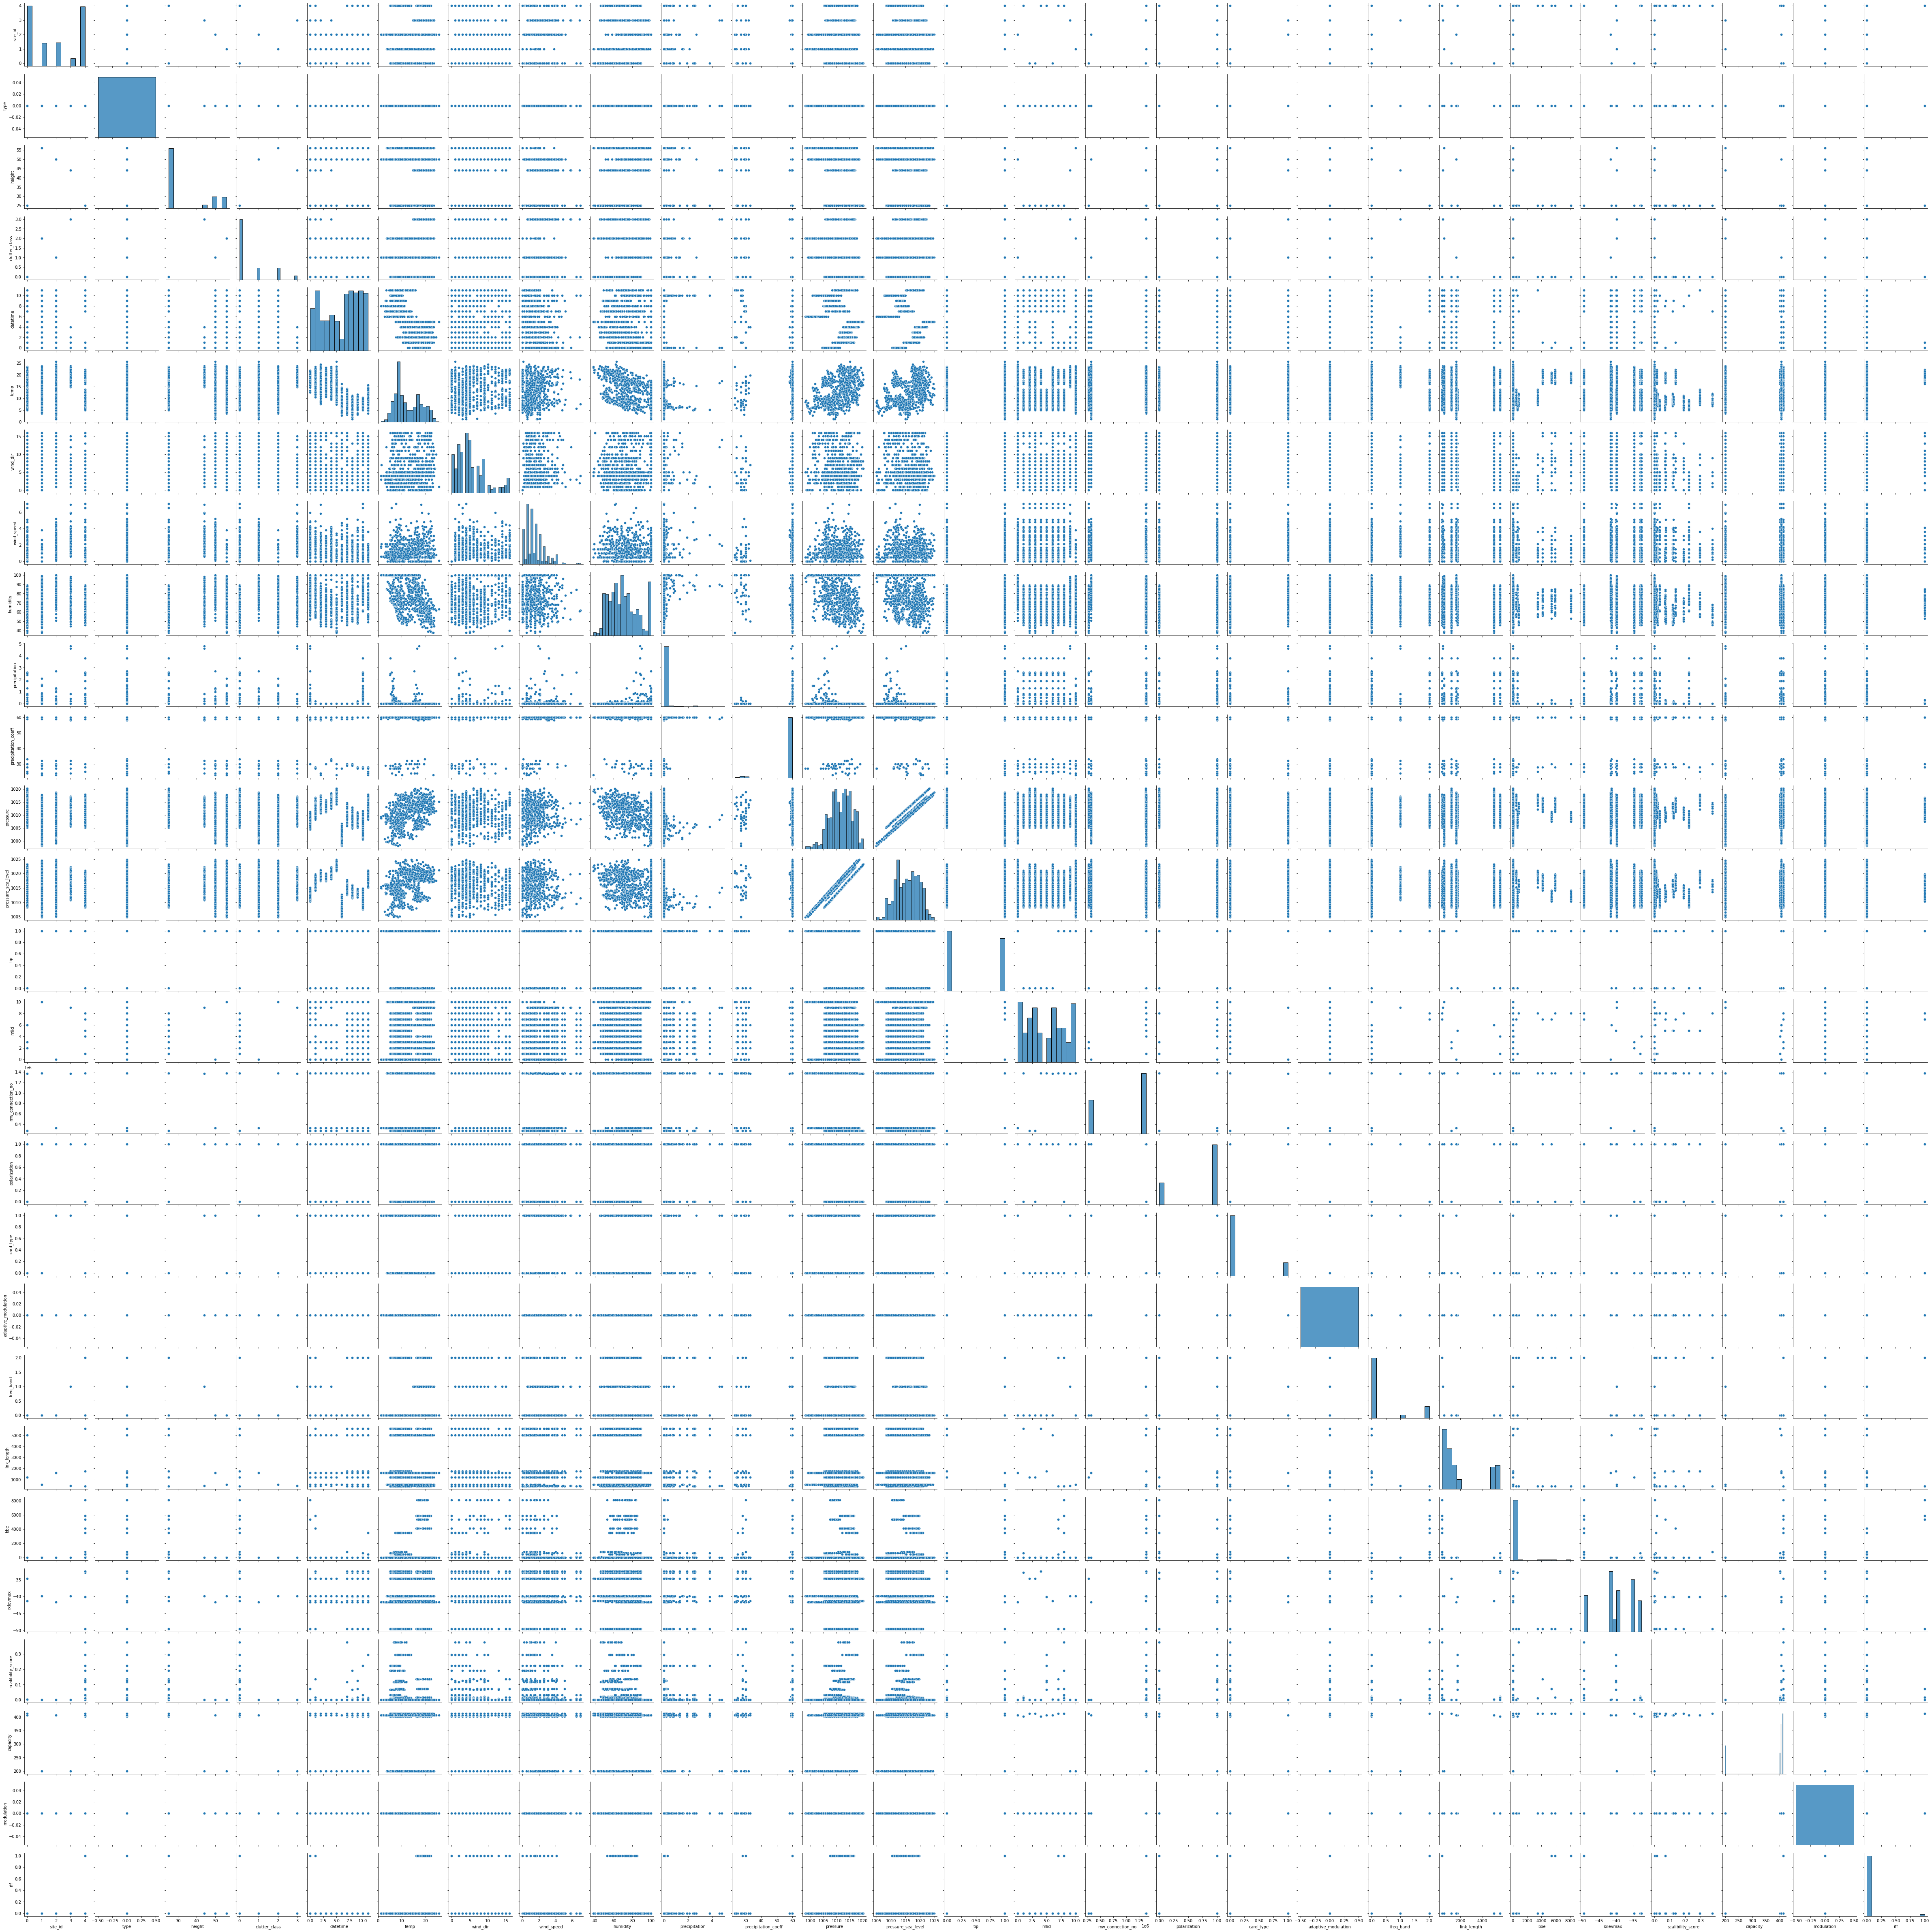

In [10]:
import seaborn as sns
sns.pairplot(Requête2)

In [11]:
#la matrice de corrélation deux à deux
print(Requête2.corr())

                      site_id  type    height  clutter_class  datetime  \
site_id              1.000000   NaN -0.114480      -0.052812  0.162244   
type                      NaN   NaN       NaN            NaN       NaN   
height              -0.114480   NaN  1.000000       0.870072 -0.169631   
clutter_class       -0.052812   NaN  0.870072       1.000000 -0.247047   
datetime             0.162244   NaN -0.169631      -0.247047  1.000000   
temp                -0.216130   NaN  0.013684       0.132446 -0.774778   
wind_dir            -0.095522   NaN  0.047994       0.006011 -0.279154   
wind_speed           0.116862   NaN -0.088077      -0.007565  0.038822   
humidity             0.029699   NaN  0.508269       0.345604 -0.117710   
precipitation        0.058103   NaN -0.054643      -0.028797  0.147734   
precipitation_coeff -0.006608   NaN -0.003637      -0.004417 -0.034676   
pressure            -0.132351   NaN -0.295799      -0.223840 -0.160991   
pressure_sea_level  -0.181654   NaN  0

In [12]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top 5 valeurs correlées")
print(get_top_abs_correlations(Requête2, 5))

Top 5 valeurs correlées
pressure       pressure_sea_level    0.931059
clutter_class  capacity              0.905268
bbe            rlf                   0.883072
height         clutter_class         0.870072
freq_band      rxlevmax              0.789479
dtype: float64


In [13]:
Requête2 = Requête2.drop(['pressure_sea_level','clutter_class'] , axis=1)#supprimer les colonnes les plus corrolées >0.9 

In [14]:
Requête2.shape


(2036, 25)

In [15]:
Requête2.head()

,site_id,type,height,datetime,temp,wind_dir,wind_speed,humidity,precipitation,precipitation_coeff,...,card_type,adaptive_modulation,freq_band,link_length,bbe,rxlevmax,scalibility_score,capacity,modulation,rlf
station_no,,,,,,,,,,,,,,,,,,,,,
WS_17232,0,0,25.0,0,17.6,9.0,2.1,79.0,0.3,60.0,...,0,0,0,1217.0,0.0,-34.7,0.0,413.0,0,0
WS_17232,0,0,25.0,0,16.5,8.0,1.0,84.0,0.0,60.0,...,0,0,0,1217.0,0.0,-34.7,0.0,413.0,0,0
WS_17232,0,0,25.0,0,17.2,7.0,1.5,75.0,0.0,60.0,...,0,0,0,1217.0,0.0,-34.7,0.0,413.0,0,0
WS_17232,0,0,25.0,0,19.3,11.0,3.1,69.0,0.0,30.0,...,0,0,0,1217.0,0.0,-34.7,0.0,413.0,0,0
WS_17232,0,0,25.0,0,20.6,2.0,1.0,60.0,0.0,60.0,...,0,0,0,1217.0,0.0,-34.7,0.0,413.0,0,0


In [16]:
X = Requête2.iloc[:,0:24]
y = Requête2.iloc[:,24]

In [17]:
X.head() #donnee pour la prediction de model
y.shape # valeur a predir

(2036,)

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3,random_state=0)# diviser les valeurs en test et training

In [19]:
print(X_train.shape)

(1425, 24)


In [20]:
from sklearn.neural_network import MLPClassifier #multiple layer persiption

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30,10)) #choix arbitrair

In [22]:
mlp.fit(X_train,y_train) # pour entrainer

MLPClassifier(hidden_layer_sizes=(50, 30, 10))

In [23]:
#calcule le score de notre model : il ya deux score 
print('train_score = ',mlp.score(X_train,y_train))
print('test_score = ',mlp.score(X_test,y_test))

train_score =  0.9698245614035088
test_score =  0.9574468085106383


In [24]:
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix , classification_report

In [25]:
y_pred = mlp.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[585,   0],
       [ 26,   0]], dtype=int64)

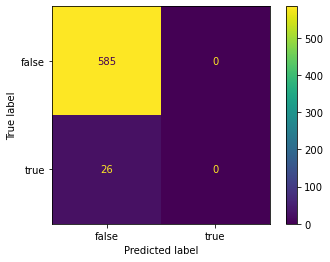

In [26]:
plot_confusion_matrix(mlp , X_test , y_test, display_labels=['false','true'])
plt.show()

In [27]:
#Aplication du modele SVM

In [28]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_range =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = {'kernel': ['linear', 'rbf'], 
              'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(svm.SVC(), param_grid, cv=5)

grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [29]:
from sklearn import svm

svm_model=svm.SVC(C=1,kernel='rbf',gamma=0.1)
svm_model.fit(X_train,y_train)
print(svm_model.score(X_train,y_train))
print(svm_model.score(X_test,y_test))

1.0
0.9770867430441899


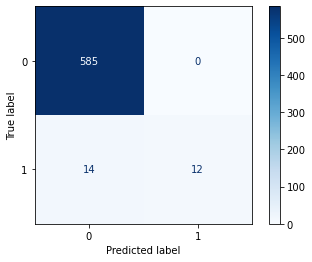

In [30]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(svm_model,X_test,y_test,cmap=plt.cm.Blues);

In [31]:
from sklearn.metrics import classification_report

y_predi=svm_model.predict(X_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.97663   1.00000   0.98818       585
           1    1.00000   0.46154   0.63158        26

    accuracy                        0.97709       611
   macro avg    0.98831   0.73077   0.80988       611
weighted avg    0.97762   0.97709   0.97300       611



In [35]:
import pickle

In [37]:
pickle.dump(Requête2,open('model.pkl','wb'))

In [38]:
pip install explainerdashboard


  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85836 sha256=50bd02ae3bbd14a5d71094b9683bd9b552f3af83aa134db06b916b6c37f6a73f
  Stored in directory: c:\users\21624\appdata\local\pip\cache\wheels\e3\1e\fa\0c810b67f082a7b9f33a128f6374b03cf5245edc45e37adbf8
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66643 sha256=888dfbb33a37cb0332e64da479a53b77c1854619015c6ec23a56c29af035b7c2
  Stored in directory: c:\users\21624\appdata\local\pip\cache\wheels\9e\37\2c\3b30269ca762b6bb992fd0abb640f3e384c290e719597fddbc
  Created wheel for dash-auth: filename=dash_auth-1.4.1-py3-none-any.whl size=476156 sha256=5c506ab16354c917fee3e66c11555d52d612f5d59213057683cfaf017de1ce8a
  Stored in directory: c:\users\21624\appdata\local\pip\cache\wheels\49\39\d4\8b86e01a8b6c9fd63051de54f4ebb256e85d9759505d749c37
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=76fe172d50c508e473a1a537c52647ab7a8ee0675fe7e3d068966ae8184b4f11
  

In [77]:
from sklearn.ensemble import RandomForestClassifier

from explainerdashboard import *
from explainerdashboard.datasets import *

X_train, y_train, X_test, y_test = titanic_survive()
model = RandomForestClassifier(n_estimators=50, max_depth=5).fit(X_train, y_train)

explainer = ClassifierExplainer(model, X_test, y_test,
                                cats=["Sex", 'Deck', 'Embarked'],
                                labels=['Not Survived', 'Survived'],
                                descriptions=feature_descriptions)

db = ExplainerDashboard(explainer)
db.to_yaml("dashboard.yaml", explainerfile="model.pkl", dump_explainer=True)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pr auc curves...
Calculating prediction probabilities...
Calculating pred_percentiles...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating liftcurve_dfs...
Calculating roc auc curves...
Calculating metrics...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computation

In [ ]:
from explainerdashboard import ExplainerDashboard

db = ExplainerDashboard.from_config("dashboard.yaml")
db.run(host='0.0.0.0', port=9050, use_waitress=True)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.12:9050
